# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import math
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [3]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame# YOUR CODE 
df = pd.read_csv("whale_navs.csv", index_col="date", parse_dates=True, infer_datetime_format=True)
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [4]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
df[['SOROS FUND MANAGEMENT LLC Returns', 'PAULSON & CO.INC. Returns', 'TIGER GLOBAL MANAGEMENT LLC Returns', 'BERKSHIRE HATHAWAY INC Returns', 'S&P 500 Returns']] = df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500']].pct_change()
df.dropna(inplace = True)
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,SOROS FUND MANAGEMENT LLC Returns,PAULSON & CO.INC. Returns,TIGER GLOBAL MANAGEMENT LLC Returns,BERKSHIRE HATHAWAY INC Returns,S&P 500 Returns
date,,,,,,,,,,
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,31.976694,15.000260,60.008249,52.049662,196.64,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

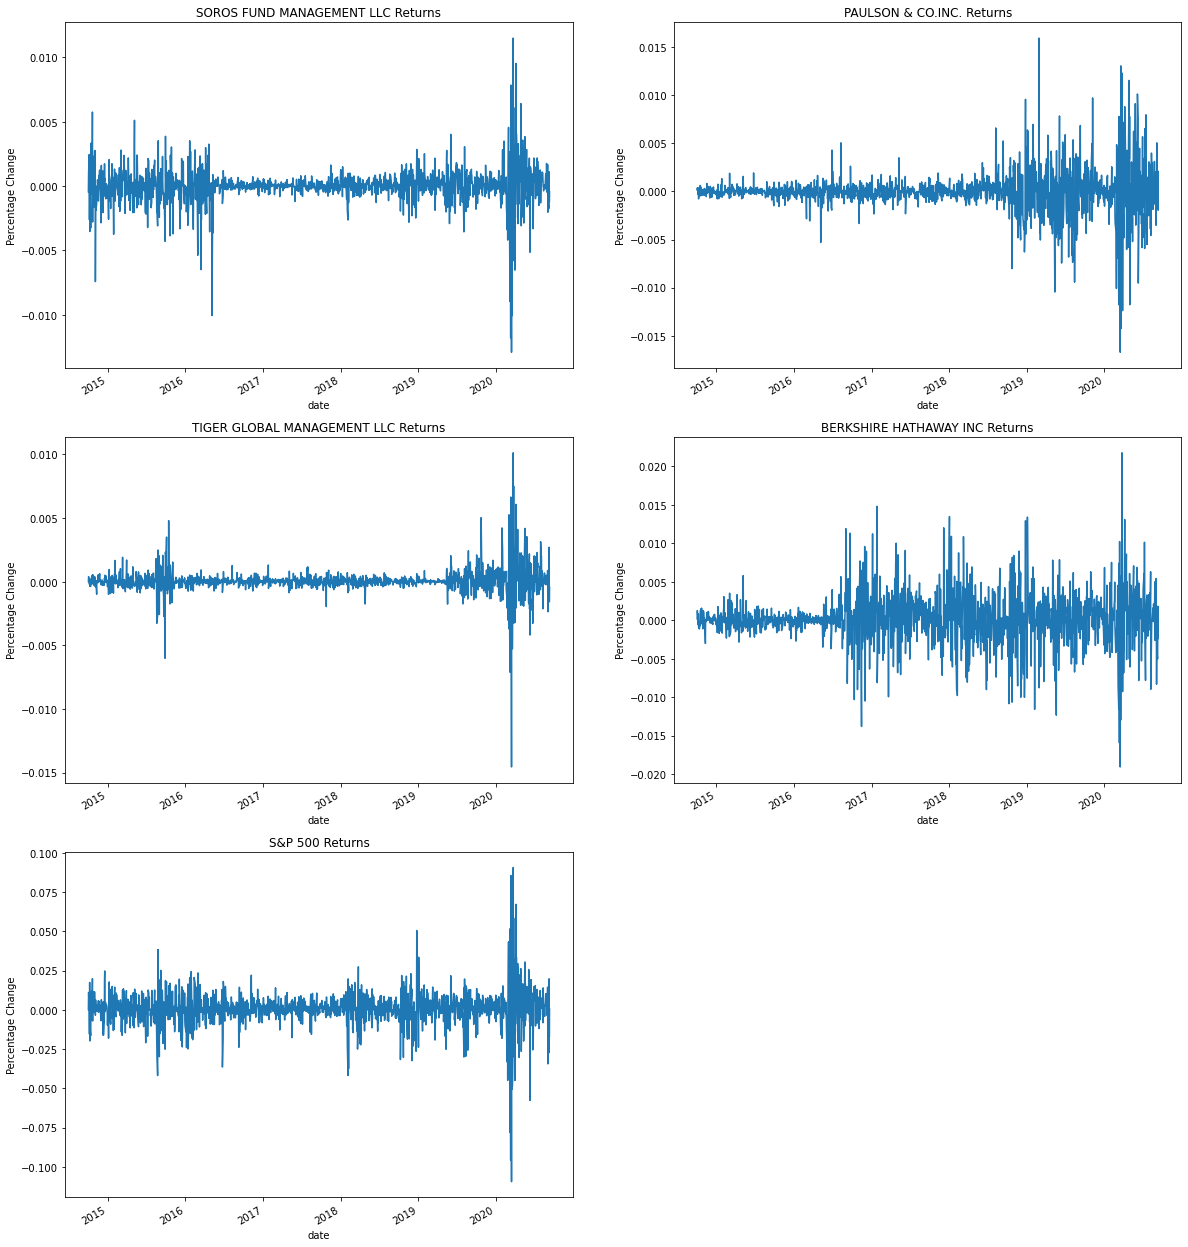

In [5]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
plt.figure(figsize = (20,24))
plt.subplot(3, 2, 1)
df['SOROS FUND MANAGEMENT LLC Returns'].plot(title = "SOROS FUND MANAGEMENT LLC Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 2)
df['PAULSON & CO.INC. Returns'].plot(title ="PAULSON & CO.INC. Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 3)
df['TIGER GLOBAL MANAGEMENT LLC Returns'].plot(title = "TIGER GLOBAL MANAGEMENT LLC Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 4)
df['BERKSHIRE HATHAWAY INC Returns'].plot(title = "BERKSHIRE HATHAWAY INC Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 5)
df['S&P 500 Returns'].plot(title = "S&P 500 Returns")
plt.ylabel("Percentage Change")
plt.show()


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [6]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
df[['SOROS FUND MANAGEMENT LLC Returns Commulative', 'PAULSON & CO.INC. Returns Commulative', 'TIGER GLOBAL MANAGEMENT LLC Returns Commulative', 'BERKSHIRE HATHAWAY INC Returns Commulative', 'S&P 500 Returns Commulative']] = df[['SOROS FUND MANAGEMENT LLC Returns', 'PAULSON & CO.INC. Returns', 'TIGER GLOBAL MANAGEMENT LLC Returns', 'BERKSHIRE HATHAWAY INC Returns', 'S&P 500 Returns']].cumprod()
df[['SOROS FUND MANAGEMENT LLC Returns Commulative', 'PAULSON & CO.INC. Returns Commulative', 'TIGER GLOBAL MANAGEMENT LLC Returns Commulative', 'BERKSHIRE HATHAWAY INC Returns Commulative', 'S&P 500 Returns Commulative']].tail()

,SOROS FUND MANAGEMENT LLC Returns Commulative,PAULSON & CO.INC. Returns Commulative,TIGER GLOBAL MANAGEMENT LLC Returns Commulative,BERKSHIRE HATHAWAY INC Returns Commulative,S&P 500 Returns Commulative
date,,,,,
2020-09-04,0.0,0.0,0.0,0.0,0.0
2020-09-08,-0.0,-0.0,-0.0,-0.0,-0.0
2020-09-09,-0.0,-0.0,-0.0,-0.0,-0.0
2020-09-10,0.0,-0.0,0.0,0.0,0.0
2020-09-11,-0.0,0.0,-0.0,-0.0,0.0


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

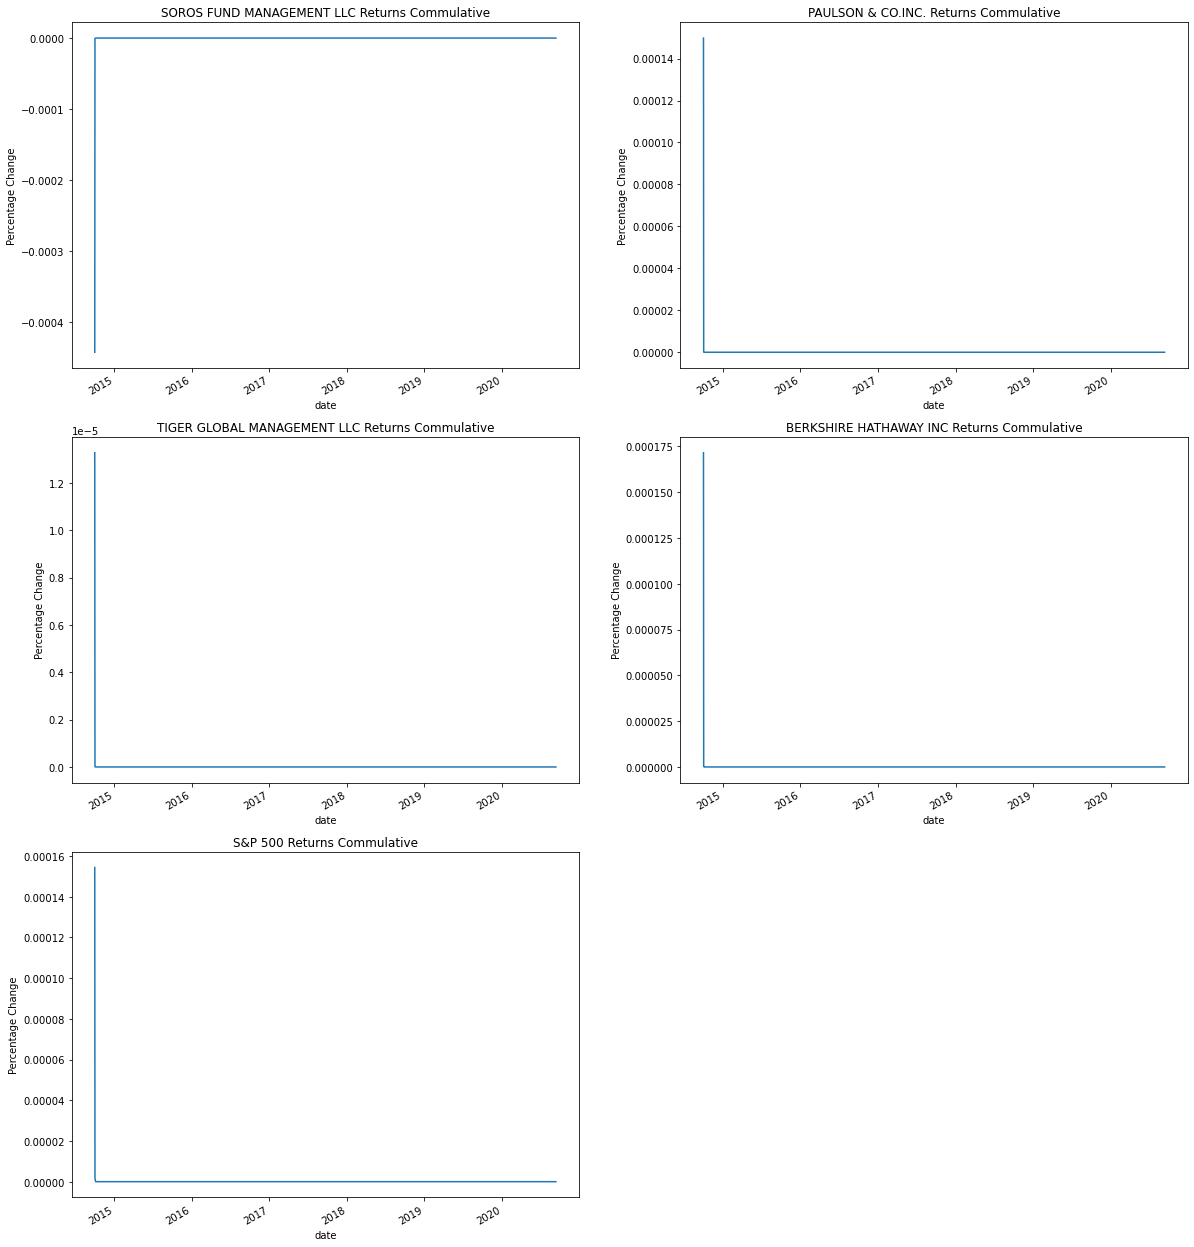

In [7]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
plt.figure(figsize = (20,24))
plt.subplot(3, 2, 1)
df['SOROS FUND MANAGEMENT LLC Returns Commulative'].plot(title = "SOROS FUND MANAGEMENT LLC Returns Commulative")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 2)
df['PAULSON & CO.INC. Returns Commulative'].plot(title ="PAULSON & CO.INC. Returns Commulative")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 3)
df['TIGER GLOBAL MANAGEMENT LLC Returns Commulative'].plot(title = "TIGER GLOBAL MANAGEMENT LLC Returns Commulative")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 4)
df['BERKSHIRE HATHAWAY INC Returns Commulative'].plot(title = "BERKSHIRE HATHAWAY INC Returns Commulative")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 5)
df['S&P 500 Returns Commulative'].plot(title = "S&P 500 Returns Commulative")
plt.ylabel("Percentage Change")
plt.show()


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # Yes, SOROS FUND MANAGEMENT LLC outperforms the S&P 500 Index

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

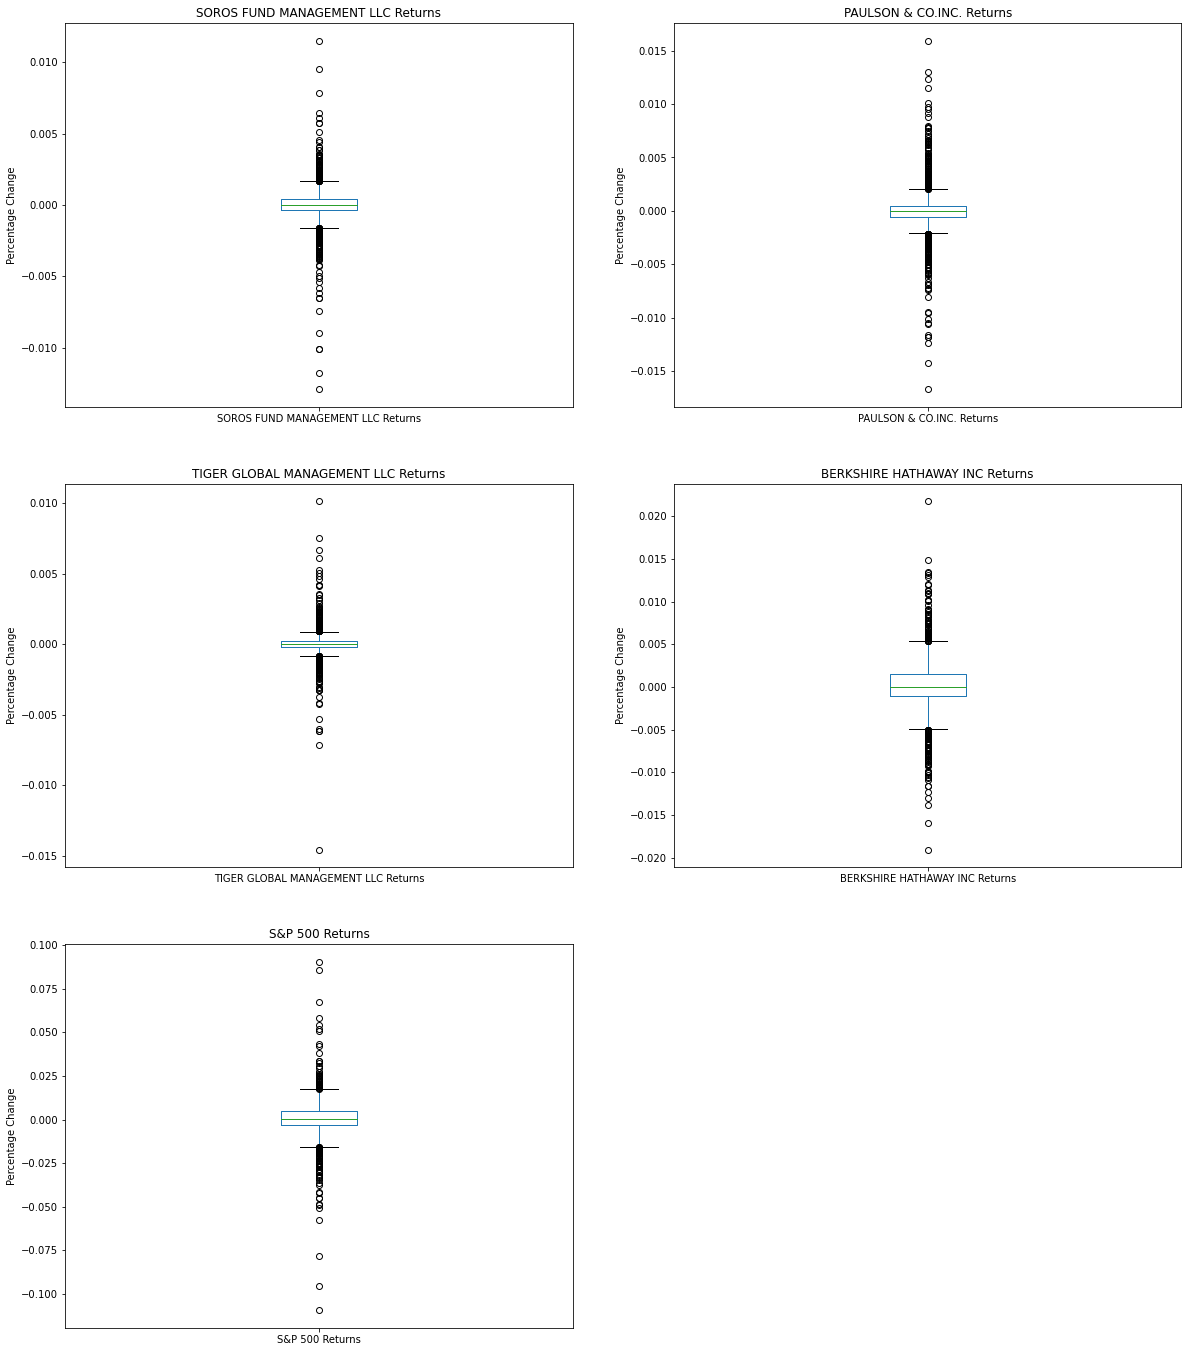

In [8]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
plt.figure(figsize = (20,24))
plt.subplot(3, 2, 1)
df['SOROS FUND MANAGEMENT LLC Returns'].plot(kind = "box", title = "SOROS FUND MANAGEMENT LLC Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 2)
df['PAULSON & CO.INC. Returns'].plot(kind = "box", title ="PAULSON & CO.INC. Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 3)
df['TIGER GLOBAL MANAGEMENT LLC Returns'].plot(kind = "box", title = "TIGER GLOBAL MANAGEMENT LLC Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 4)
df['BERKSHIRE HATHAWAY INC Returns'].plot(kind = "box", title = "BERKSHIRE HATHAWAY INC Returns")
plt.ylabel("Percentage Change")
plt.subplot(3, 2, 5)
df['S&P 500 Returns'].plot(kind = "box", title = "S&P 500 Returns")
plt.ylabel("Percentage Change")
plt.show()



#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

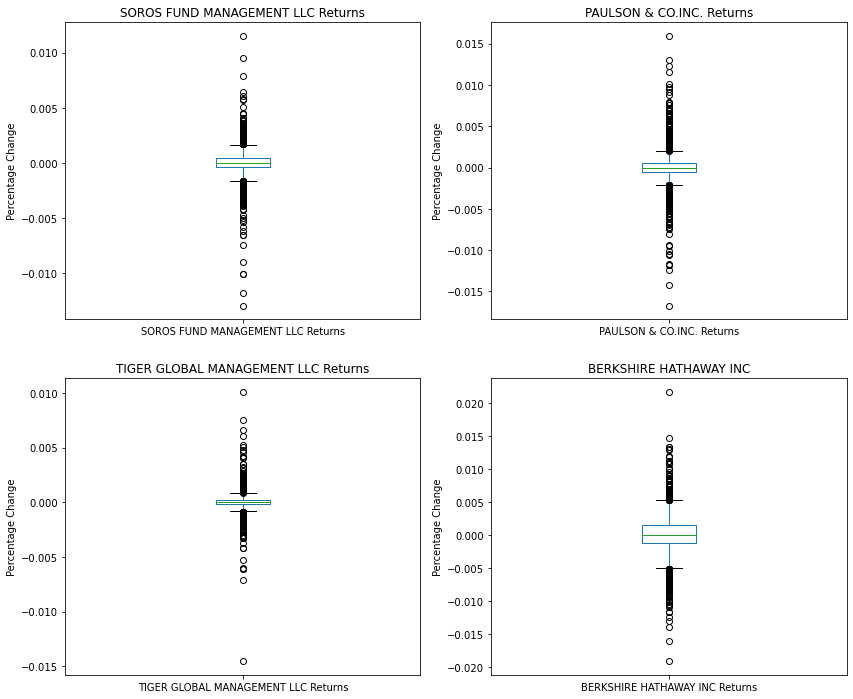

In [9]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
df_new = df.drop(columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500',
                            'SOROS FUND MANAGEMENT LLC Returns Commulative',
       'PAULSON & CO.INC. Returns Commulative',
       'TIGER GLOBAL MANAGEMENT LLC Returns Commulative',
       'BERKSHIRE HATHAWAY INC Returns Commulative',
       'S&P 500 Returns Commulative'])
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
plt.figure(figsize = (14,12))
plt.subplot(2, 2, 1)
df_new['SOROS FUND MANAGEMENT LLC Returns'].plot(kind = "box", title = "SOROS FUND MANAGEMENT LLC Returns")
plt.ylabel("Percentage Change")
plt.subplot(2, 2, 2)
df_new['PAULSON & CO.INC. Returns'].plot(kind = "box", title ="PAULSON & CO.INC. Returns")
plt.ylabel("Percentage Change")
plt.subplot(2, 2, 3)
df_new['TIGER GLOBAL MANAGEMENT LLC Returns'].plot(kind = "box", title = "TIGER GLOBAL MANAGEMENT LLC Returns")
plt.ylabel("Percentage Change")
plt.subplot(2, 2, 4)
df_new['BERKSHIRE HATHAWAY INC Returns'].plot(kind = "box", title = "BERKSHIRE HATHAWAY INC")
plt.ylabel("Percentage Change")
plt.show()


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # BERKSHIRE HATHAWAY INC Returns are the most volatile  & SOROS FUND MANAGEMENT LLC Returns are the least volatile

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [10]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
df_new.std().sort_values(ascending=True)


TIGER GLOBAL MANAGEMENT LLC Returns    0.000996
SOROS FUND MANAGEMENT LLC Returns      0.001405
PAULSON & CO.INC. Returns              0.002199
BERKSHIRE HATHAWAY INC Returns         0.003256
S&P 500 Returns                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [11]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
df_new.std()*math.sqrt(252)


SOROS FUND MANAGEMENT LLC Returns      0.022297
PAULSON & CO.INC. Returns              0.034912
TIGER GLOBAL MANAGEMENT LLC Returns    0.015804
BERKSHIRE HATHAWAY INC Returns         0.051692
S&P 500 Returns                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

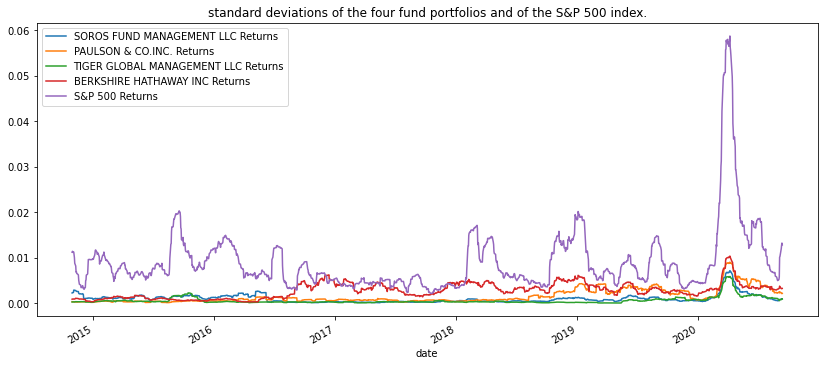

In [12]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
df_new.rolling(window=21).std().plot(title = "standard deviations of the four fund portfolios and of the S&P 500 index.", figsize = (14,6))
plt.show()

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

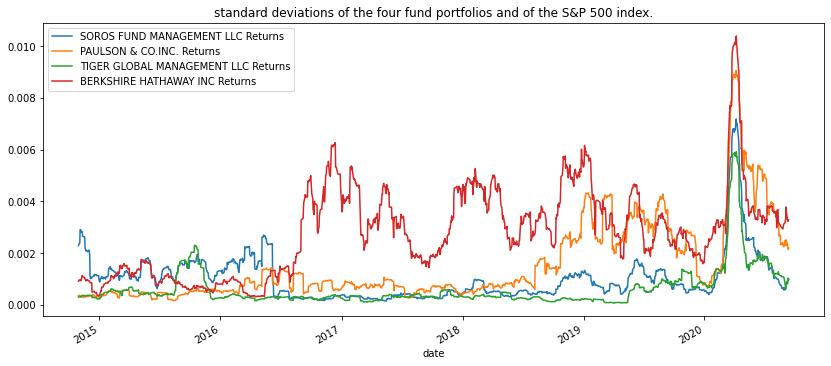

In [13]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
df_new.drop(columns= "S&P 500 Returns").rolling(window=21).std().plot(title = "standard deviations of the four fund portfolios and of the S&P 500 index.", figsize = (14,6))
plt.show()


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # PAULSON & CO.INC. Portfolio has more risk than the S&P 500

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # Yes, when the risk of the S&P 500 increases at the same time other portfolio risk also increases


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # BERKSHIRE HATHAWAY INC has more risk then others, yes its changes over time

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [14]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
(df_new.mean()*math.sqrt(252)).sort_values(ascending=True)



PAULSON & CO.INC. Returns             -0.000418
SOROS FUND MANAGEMENT LLC Returns     -0.000144
TIGER GLOBAL MANAGEMENT LLC Returns    0.000576
BERKSHIRE HATHAWAY INC Returns         0.002336
S&P 500 Returns                        0.006810
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [15]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
((df_new.mean()*math.sqrt(252))/(df_new.std()*math.sqrt(252))).sort_values(ascending=True)


PAULSON & CO.INC. Returns             -0.011969
SOROS FUND MANAGEMENT LLC Returns     -0.006444
TIGER GLOBAL MANAGEMENT LLC Returns    0.036474
S&P 500 Returns                        0.037142
BERKSHIRE HATHAWAY INC Returns         0.045199
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

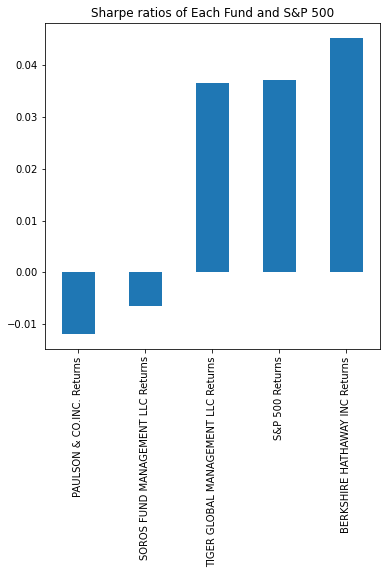

In [16]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
((df_new.mean()*math.sqrt(252))/(df_new.std()*math.sqrt(252))).sort_values(ascending=True).plot(kind = "bar", title = "Sharpe ratios of Each Fund and S&P 500", figsize = (6,6))
plt.show()


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # BERKSHIRE HATHAWAY INC is best risk return. and the worst is PAULSON & CO.INC.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

<AxesSubplot:xlabel='date'>

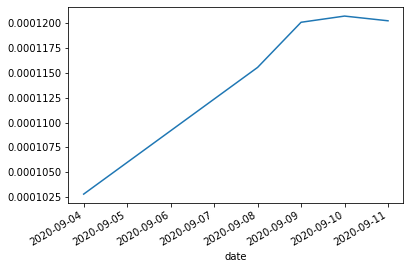

In [17]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
df_new["S&P 500 Returns"].rolling(window=60).var().tail().plot()

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [18]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
df_new[["SOROS FUND MANAGEMENT LLC Returns", "S&P 500 Returns"]].rolling(window=60).cov(pairwise=False).tail()


,SOROS FUND MANAGEMENT LLC Returns,S&P 500 Returns
date,,
2020-09-04,0.000001,0.000103
2020-09-08,0.000001,0.000116
2020-09-09,0.000001,0.000120
2020-09-10,0.000001,0.000121
2020-09-11,0.000001,0.000120


##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [19]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
beta_portfolio1 = (df_new["SOROS FUND MANAGEMENT LLC Returns"].rolling(window=60).cov())/(df_new["S&P 500 Returns"].rolling(window=60).var())
beta_portfolio1.tail()

date
2020-09-04    0.011577
2020-09-08    0.010645
2020-09-09    0.010161
2020-09-10    0.010269
2020-09-11    0.010250
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [20]:
# Calculate the average of the 60-day rolling beta
beta_portfolio1.rolling(window=60).mean().tail()

date
2020-09-04    0.015044
2020-09-08    0.014925
2020-09-09    0.014810
2020-09-10    0.014689
2020-09-11    0.014572
dtype: float64

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolia (SOROS FUND MANAGEMENT LLC Returns)'}, xlabel='date'>

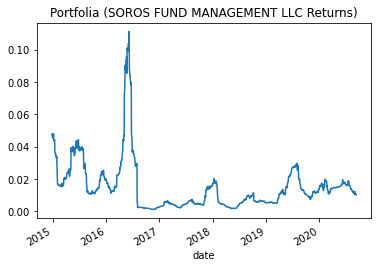

In [21]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
beta_portfolio1.plot(title = "Portfolia (SOROS FUND MANAGEMENT LLC Returns)")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [22]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
beta_portfolio2 = (df_new["BERKSHIRE HATHAWAY INC Returns"].rolling(window=60).cov())/(df_new["S&P 500 Returns"].rolling(window=60).var())
beta_portfolio2.tail()

date
2020-09-04    0.112154
2020-09-08    0.101932
2020-09-09    0.097841
2020-09-10    0.097779
2020-09-11    0.098239
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [23]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
beta_portfolio2.rolling(window=60).mean().tail()

date
2020-09-04    0.060097
2020-09-08    0.061122
2020-09-09    0.062081
2020-09-10    0.062987
2020-09-11    0.063882
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [24]:
# Calculate the average of the 60-day rolling beta
beta_portfolio2.rolling(window=60).mean().tail()

date
2020-09-04    0.060097
2020-09-08    0.061122
2020-09-09    0.062081
2020-09-10    0.062987
2020-09-11    0.063882
dtype: float64

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolia (BERKSHIRE HATHAWAY INC Returns)'}, xlabel='date'>

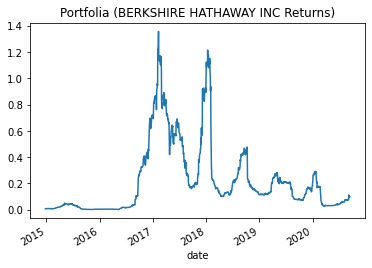

In [25]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
beta_portfolio2.plot(title = "Portfolia (BERKSHIRE HATHAWAY INC Returns)")


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** BERKSHIRE HATHAWAY INC Portfolio is more sensitive

**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # I recommend SOROS FUND MANAGEMENT LLC Portfolio

---